## Clustering

### Librerías

In [1]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler # Pre-procesamiento
from sklearn.compose import make_column_transformer # Pre-procesamiento

from sklearn.decomposition import PCA # Reducción de dimensionalidad

from sklearn.model_selection import train_test_split # Dividir datos

from sklearn.cluster import KMeans # Clustering

In [2]:
# Resultados reproducibles
np.random.seed(42)

In [3]:
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='darkgrid')

### Conjunto de datos

![Nepal](https://drive.google.com/uc?id=1Ki_4IAbj6LmC44nPsol8jm_PwQC2RM9B)

El conjunto de datos está relacionado con la actividad sísmica de Nepal.

Desde 1994 hasta 2016, ha habido más de 900 temblores significativos en Nepal. Solo en el año 2015 hubo más de 400 temblores significativos en Nepal.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/miryamelizabeth/datasets/main/Datasets%20ML/dataset_nepal_earthquake.csv')
df.head()

,DateTime,Epicenter,Lat,Long,Magnitude
0,1994-06-25 05:45:00,Dolakha,27.75,86.16,5.1
1,1994-07-17 11:00:00,Bajura,29.37,81.52,5.5
2,1994-09-25 11:00:00,Sankhuwasabha,28.34,87.35,4.8
3,1994-10-22 11:00:00,Jajarkot,29.00,82.26,4.6
4,1994-10-24 11:00:00,Jajarkot,28.92,82.00,4.7


In [5]:
df.shape

(933, 5)

**Reescalamiento de datos**

In [6]:
# Separamos los predictores
X = df[['Lat', 'Long', 'Magnitude']]

In [7]:
# TODAS las columnas numéricas se guardan en una lista
num_cols = ['Lat', 'Long', 'Magnitude']

# Creamos el transformer, le indicamos el objeto y las columnas y ajustamos con un MixMax
transformer = make_column_transformer( (MinMaxScaler(), num_cols) )
transformer.fit(X)

# Transforma los datos
X = transformer.transform(X)

**Búsqueda del valor óptimo de K**

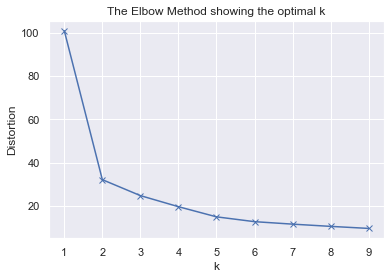

In [9]:
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_) # obtenemos inercia

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Agrupamiento

In [10]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

print(f'Centros:\n{centers}\n')
print(f'Labels: {labels[:20]}...')

Centros:
[[0.31234942 0.68732623 0.20250687]
 [0.72493283 0.17802672 0.22780488]]

Labels: [0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0]...


### Visualización 1

In [11]:
df['cluster'] = labels
df.head()

,DateTime,Epicenter,Lat,Long,Magnitude,cluster
0,1994-06-25 05:45:00,Dolakha,27.75,86.16,5.1,0
1,1994-07-17 11:00:00,Bajura,29.37,81.52,5.5,1
2,1994-09-25 11:00:00,Sankhuwasabha,28.34,87.35,4.8,0
3,1994-10-22 11:00:00,Jajarkot,29.00,82.26,4.6,1
4,1994-10-24 11:00:00,Jajarkot,28.92,82.00,4.7,1


In [12]:
#@title Obtenemos cuantos datos hay que cada cluster...
resultado = df['cluster'].value_counts(normalize='True').round(3) * 100
resultado.to_frame(name='elementos(%)').reset_index().rename(columns={'index': 'cluster'})

,cluster,elementos(%)
0,0,78.0
1,1,22.0


**Un poco de exploración...**

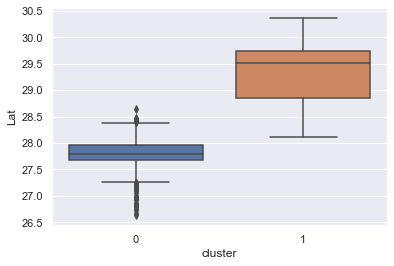

In [13]:
sns.boxplot(x='cluster', y='Lat', data=df)
plt.show()

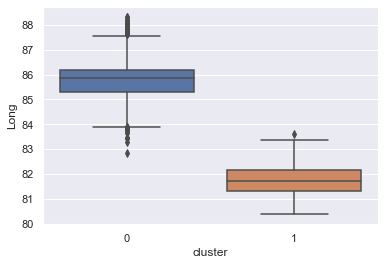

In [14]:
sns.boxplot(x='cluster', y='Long', data=df)
plt.show()

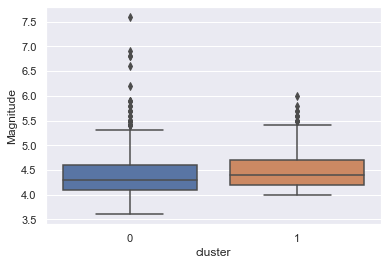

In [15]:
sns.boxplot(x='cluster', y='Magnitude', data=df)
plt.show()

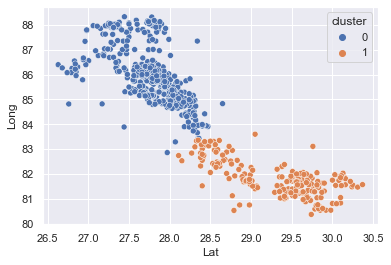

In [17]:
sns.scatterplot(x='Lat', y='Long', hue='cluster', data=df)
plt.show()

### Visualizacion 2

In [21]:
# Creamos objeto PCA, enviamos el número de componentes a obtener (número de atributos/dimensiones)
pca = PCA(n_components=2)
pca.fit(X)

# Convertimos nuestros datos y los centros a las nuevas dimensiones de PCA
X_pca = pca.transform(X)
pca_centers = pca.transform(centers)

Vamos a crear un nuevo DataFrame con X transformado y los labels obtenidos

In [22]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels
pca_df.head()

,PC1,PC2,cluster
0,-0.177765,0.173399,0
1,0.550550,0.245982,1
2,-0.196264,0.123639,0
3,0.408847,0.024786,1
4,0.421427,0.045082,1


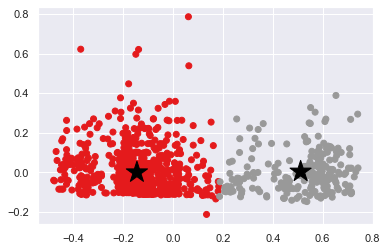

In [23]:
color_list = ['black', 'black']

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap=plt.cm.Set1)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c=color_list, marker='*', s=500)
plt.show()


---


📝 **Referencias**

*Dataset obtenido de Github repository:* [Saralkarki](https://medium.com/saralkarki/earthquake-cluster-analysis-k-means-approach-cdb2bf6cb21b)